In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Check shape of the data

In [4]:
df.shape

(8807, 12)

# Basic info of the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# There is null value : director, cast, country, date_added, rating & duration

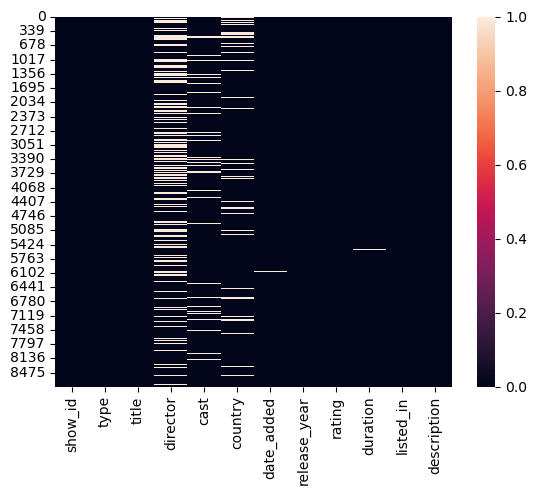

In [24]:
#plt.figure(figsize=(15,8))
sns.heatmap(df.isna())
plt.show()

# Total size of the data

In [25]:
df.size

105684

# List down the total columns

In [29]:
df.keys()

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [30]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Type of Content availavle 

In [31]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [32]:
df['type'].nunique()

2

# Total country acces Netflix

In [33]:
df['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

In [34]:
df['country'].nunique()

748

# Type of content rating

In [45]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [46]:
df['rating'].nunique()

17

# Most popular content rating

In [49]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

# Rating TV-MA & TV-14 popular accros which country

In [88]:
df_rating_MA_14=df.loc[(df['rating']=='TV-MA')|(df['rating']=='TV-14')]
df_rating_MA_14

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8794,s8795,Movie,اشتباك,Mohamed Diab,"Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...","Egypt, France","October 11, 2018",2016,TV-14,98 min,"Dramas, Independent Movies, International Movies",Amid the tumult following Egyptian President M...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...


In [89]:
df_rating_MA_14['country'].dropna(inplace=True)

/var/folders/t2/3z1ygvv95h72q7ygpfjbdsgr0000gn/T/ipykernel_71913/3012822446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating_MA_14['country'].dropna(inplace=True)


In [90]:
df_rating_MA_14

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8794,s8795,Movie,اشتباك,Mohamed Diab,"Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...","Egypt, France","October 11, 2018",2016,TV-14,98 min,"Dramas, Independent Movies, International Movies",Amid the tumult following Egyptian President M...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...


In [91]:
df_rating_MA_14['country'].unique()

array(['South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'United States',
       'Mexico', 'Turkey', 'Australia', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United States, United Kingdom', 'France, United States', 'Spain',
       'Argentina, Venezuela', 'China, Hong Kong', 'Canada', 'Hong Kong',
       'United Kingdom, United States', ', South Korea', 'Ireland',
       'Italy, Brazil, Greece', 'Argentina', 'Jordan', 'Colombia',
       'South Korea', 'Israel, United States', 'Brazil',
       'Argentina, Spain', 'Taiwan', 'United States, Nigeria',
       ', France, Algeria', 'Poland', 'Germany',
       'France, Israel, Germany, United States, United Kingdom',
       'Canada, United States', 'New Zealand', 'Saudi Arabia', 'Thailand',
       'Italy', 'United States, Canada', 'Kuwait, United States',
       'United States, Japan', 'France, Neth

In [92]:
df_rating_MA_14['country'].nunique()

409

# USA is the higets with content TV-MA/14

In [93]:
df_rating_MA_14['country'].value_counts()

United States                       1334
India                                798
United Kingdom                       249
Japan                                178
South Korea                          168
                                    ... 
Italy, Belgium                         1
Argentina, United States, Mexico       1
Finland, Germany, Belgium              1
Canada, Norway                         1
United Arab Emirates, Jordan           1
Name: country, Length: 409, dtype: int64

In [94]:
df_rating_MA_14_country_count=df_rating_MA_14['country'].value_counts()
df_rating_MA_14_country_count

United States                       1334
India                                798
United Kingdom                       249
Japan                                178
South Korea                          168
                                    ... 
Italy, Belgium                         1
Argentina, United States, Mexico       1
Finland, Germany, Belgium              1
Canada, Norway                         1
United Arab Emirates, Jordan           1
Name: country, Length: 409, dtype: int64

In [95]:
df_rating_MA_14_country_count.index

Index(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea',
       'Spain', 'France', 'Egypt', 'Turkey', 'Mexico',
       ...
       'Brazil, United States', 'United Kingdom, Hong Kong',
       'South Africa, Nigeria', 'Singapore, Malaysia',
       'United States, United Kingdom, Germany', 'Italy, Belgium',
       'Argentina, United States, Mexico', 'Finland, Germany, Belgium',
       'Canada, Norway', 'United Arab Emirates, Jordan'],
      dtype='object', length=409)